## Data Type

Model require numpy array as input. To reduce the data size, we store numpy array as HDFS

## Shrink the data

1) 620K images in total, the least frames a person has is 48 frames. 1600 person in total

2) We will Randomly Shrink the data to 48 images per person

In [30]:
# How many video do each person have?
import os
test_list = []
for i in next(os.walk("frame_images_DB"))[1]:
    test_list.append(len(next(os.walk(os.path.join("frame_images_DB/",i)))[1]))
    
a = 0
for i in range(6):
    print(test_list.count(i+1))

591
471
307
167
51
8


In [28]:
test_list.count(i+1)

1595

In [1]:
import os
from tqdm import tqdm_notebook
label_list = []
for root, dirs, files in tqdm_notebook(os.walk("frame_images_DB")):
    for file in files:
        if file.endswith(".jpg"):
            label_list.append(root.split('/')[1])
#             print(root.split('/')[1])

In [2]:
# 620K frames
len(label_list)

621126

In [3]:
# 1600 person
len(set(label_list))

1595

In [4]:
# least frames per person is 48
from itertools import groupby
min([len(list(group)) for key, group in groupby(label_list)])

48

In [5]:
# Names of those people
for key, group in groupby(label_list):
    if len(list(group)) == 48:
        print(key)

Liza_Minnelli
Danny_Ainge
Tanya_Holyk
Angela_Merkel


### Shrinkage

In [6]:
# list number of folders contain frames
test_list = list(set(label_list))
folder_set = set()
for root, dirs, files in tqdm_notebook(os.walk("frame_images_DB")):
    for file in files:
        if file.endswith(".jpg"):
            name = root.split('/')[1]            
            if name in test_list:
                folder_set.add(root)
                test_list.remove(name)

In [7]:
len(folder_set)

1595

In [8]:
import random
file_list = []
for path in folder_set:
    file = random.sample(os.listdir(path),48)
    for i in file:
        file_list.append(path+'/'+i)

In [9]:
len(file_list)

76560

In [10]:
file_list[1]

'frame_images_DB/Lynne_Cheney/0/0.372.jpg'

## Data Conversion

Extract X and Y from images

tested with 240X320X3 data size, got to 942 files,
Numpy Array size is 1.65G
Need to Reduce Frame Size

In [12]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
Image_array = np.empty((1,60,80,3))
Label = []
for path in tqdm_notebook(file_list):
    img = load_img(path,target_size=(60,80,3))
    x = img_to_array(img)
    x=x.reshape(1,x.shape[0],x.shape[1],3)
    Image_array = np.vstack((Image_array,x))
    Label.append(path.split('/')[1])

KeyboardInterrupt: 

In [187]:
len(Image_array)

942

In [188]:
len(Label)

941

In [189]:
Image_array

array([[[[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        ...,

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
       

In [185]:
Label

['Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Lee_Baca',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_Smith',
 'Katie_

In [89]:
Image_array.shape

(427, 240, 320, 3)

In [80]:
 arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

In [83]:
arr

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [81]:
arr.shape

(3, 4)

In [85]:
np.delete(arr, 0,0)

array([[ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

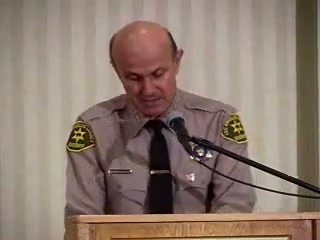

In [190]:
from keras.preprocessing.image import array_to_img
img_test = array_to_img(Image_array[1])
img_test

In [61]:
# convert labels to OHE
from keras import utils
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(label_list_test)
encoded_Y = encoder.transform(label_list_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = utils.to_categorical(encoded_Y)


# Build NN Structure
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

batch_size = 128
num_classes = 2
epochs = 12
input_shape = (240, 320, 3)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation ='relu',
                 input_shape =input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()


history1 = model.fit(Image_array, dummy_y,
                     batch_size = batch_size,
                     epochs = epochs,
                     verbose = 2
                     )
                     
# test_loss,test_acc = model.evaluate(X_test,y_test)
# print('test_acc',test_acc)
# 98.67%

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 238, 318, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 236, 316, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 118, 158, 64)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 118, 158, 64)      0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1193216)           0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               152731776 
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
__________

KeyboardInterrupt: 

In [64]:
model.predict(Image_array[2].reshape(1,240, 320, 3))

array([[1., 0.]], dtype=float32)

### test crop

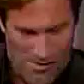

In [20]:
from PIL import Image

crop_rectangle = (195,95, 279,179)
cropped_im = img.crop(crop_rectangle)

cropped_im